<a href="https://colab.research.google.com/github/itskrh/PRODIGY_DS_03/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import seaborn as snr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [63]:
#Data Gathering
data = pd.read_csv("/content/bank.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [64]:
#Data Pre-processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [65]:
#Statistical Analysis
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [66]:
#Checking Missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [67]:
#There are no missing values in this dataset
#Checking for duplicates
data.duplicated().sum()

0

In [68]:
#There are no duplicate values in this dataset

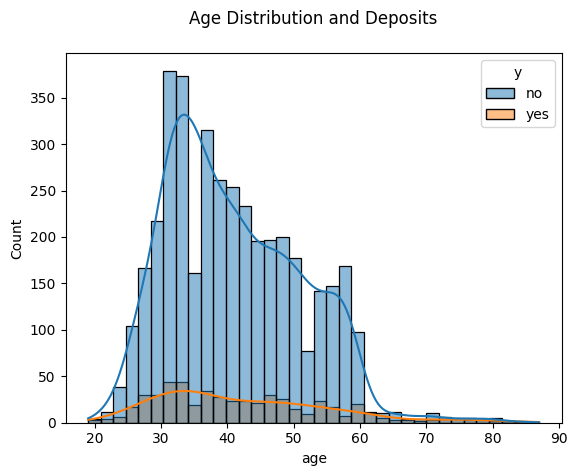

In [69]:
#Exploratory Data Analysis
#Age Distribution
snr.histplot(x="age", data=data, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

In [70]:
#Conclusion- Majority clients subscribing to Term Deposit fall between age(30 - 40) age groups.Also, maximum number of clients are from 30-40 age groups.

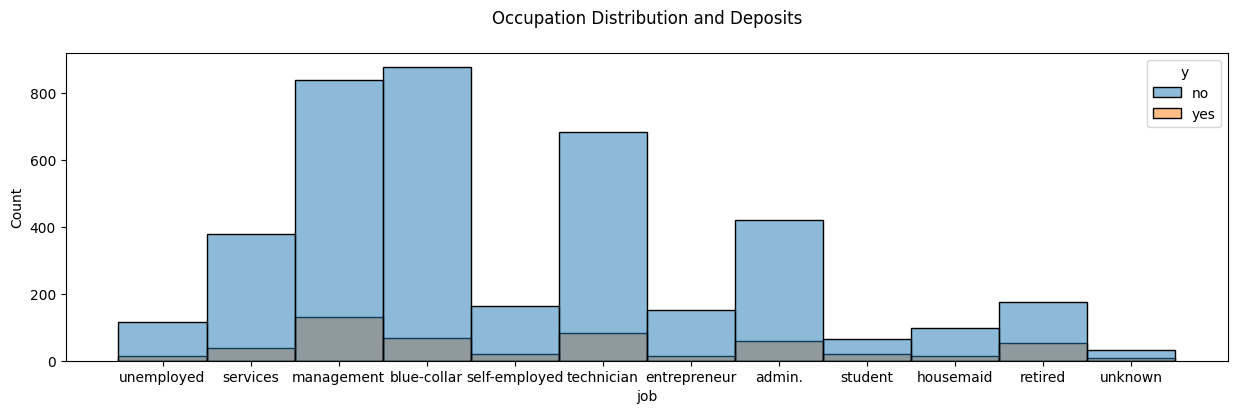

In [71]:
#Distribution of Occupation
plt.figure(figsize=(15,4))
snr.histplot(x="job", data=data, hue="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

In [72]:
#Conclusion- Majority clients subscribing to Term Deposit  are from occupation - "Admin", "blue-collar" or "Technician".Also, maximum number of clients are also from same occupation - "Admin", "blue-collar" or "Technician".

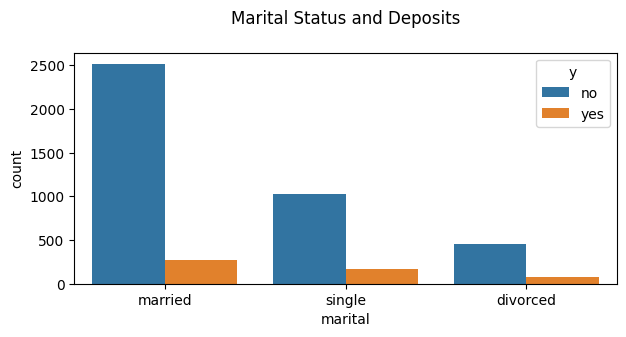

In [73]:
#Distribution of Marital Status
plt.figure(figsize=(7,3))
snr.countplot(x="marital", data= data, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

In [74]:
#Conclusion- Maximum number of clients are married. Majority clients subscribing to Term Deposit are also married persons.

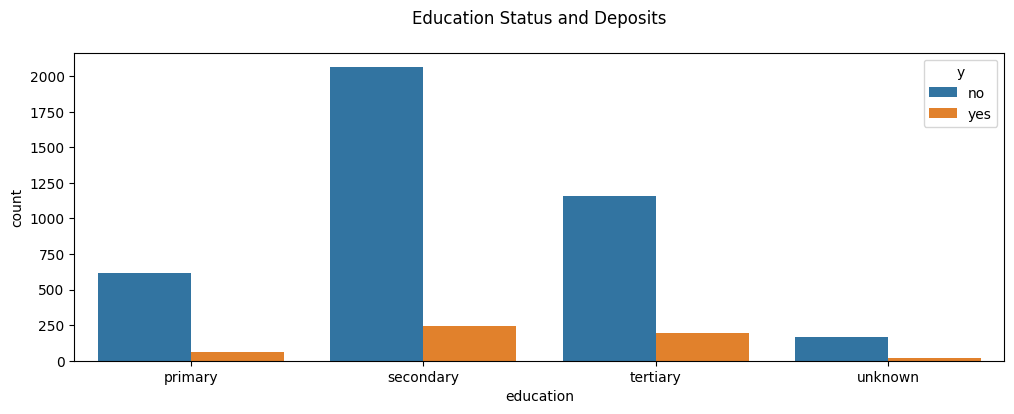

In [75]:
#Distribution of Education Status
plt.figure(figsize=(12,4))
snr.countplot(x="education", data= data, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

In [76]:
#Conclusion- Most of the clients have University degree and have studied high or professional course.

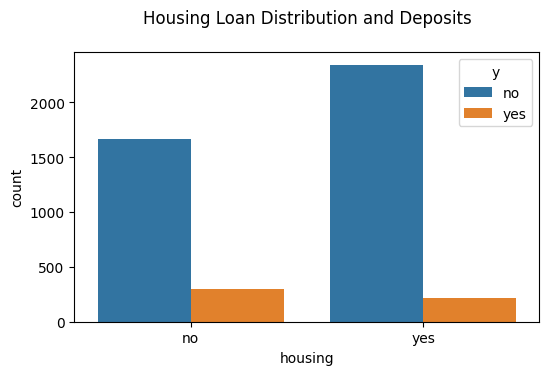

In [77]:
#Distribution of Housing Loan
plt.figure(figsize=(6,3.5))
snr.countplot(x="housing", data= data, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

In [78]:
#Conclusion- Clients subscribing to Term Deposits mostly have Home loan.

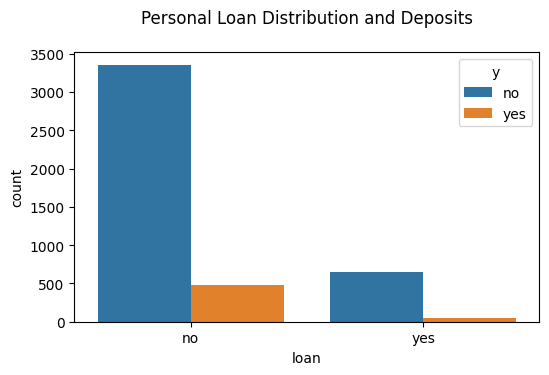

In [79]:
#Distribution of Personal Loan
plt.figure(figsize=(6,3.5))
snr.countplot(x="loan", data= data, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

In [80]:
#Conclusion-Most of the Clients subscribing to Term Deposits dont have personal loan

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

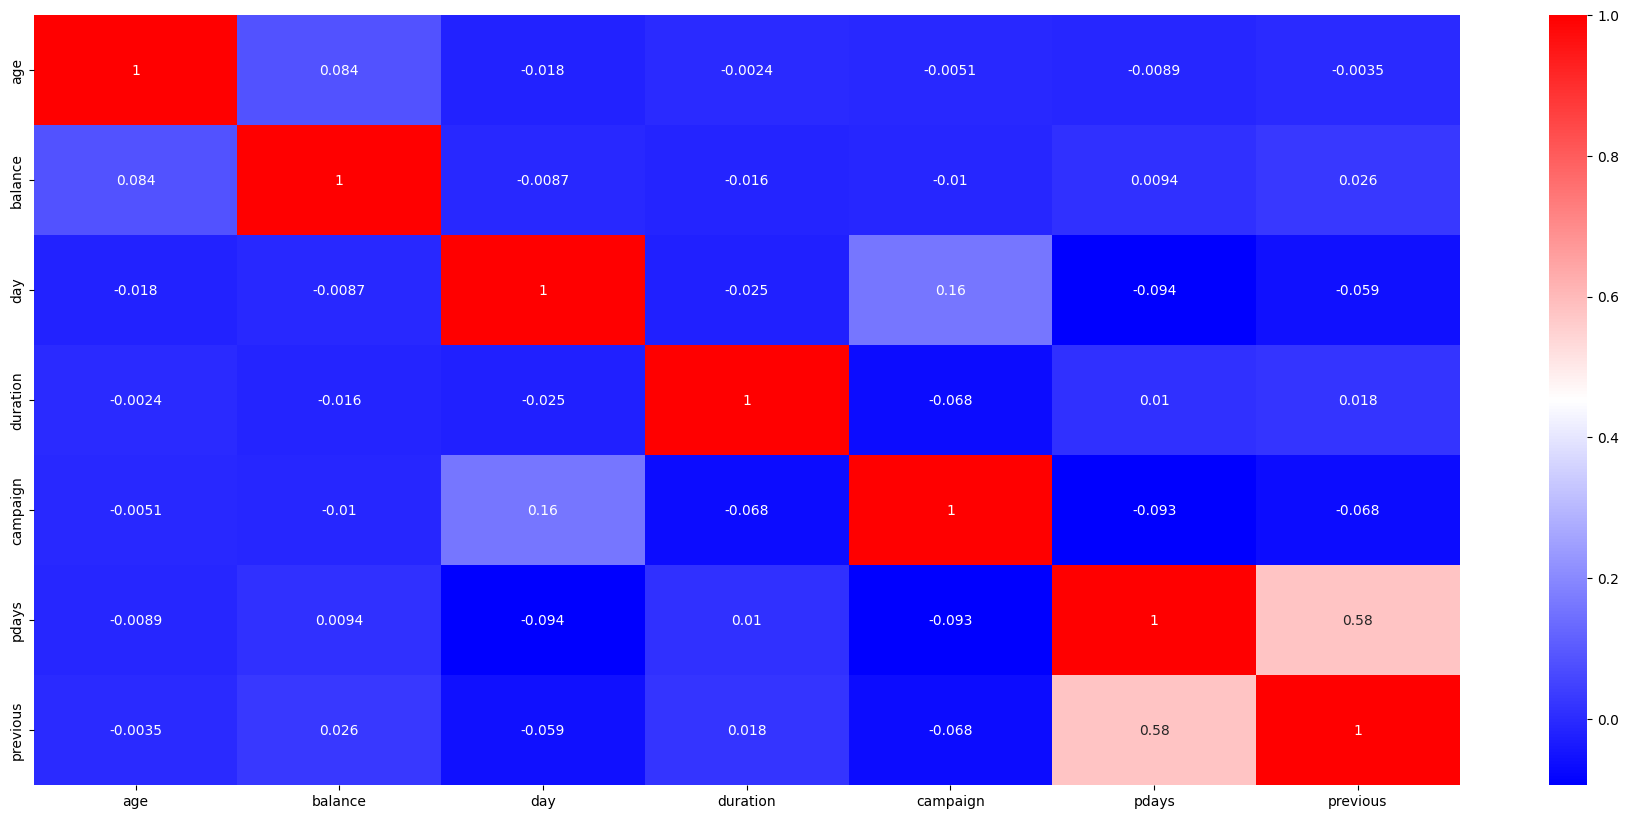

In [81]:
#Correlation Analysis using Heatmap-
plt.figure(figsize=(23,10))
data_new=data.drop(['job','marital','education','contact','month','default','housing','loan','poutcome','y'],axis=1)
print(data)
snr.heatmap(data_new.corr(),cmap='bwr',annot=True)
plt.show()

In [82]:
#Outcome "y" is positively correlated with duration of call and shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.

In [83]:
#Standardisation
#Splitting input and output
X = data_new
y = data.y
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [84]:
#Model building - Decision Tree Classifier
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))
ypred = decision_tree.predict(test_X)

Train Score: 1.0
Test Score: 0.847457627118644


In [85]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [86]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9054993678887484
Test Score: 0.887988209285188


In [87]:
pred_y = clf.predict(test_X)

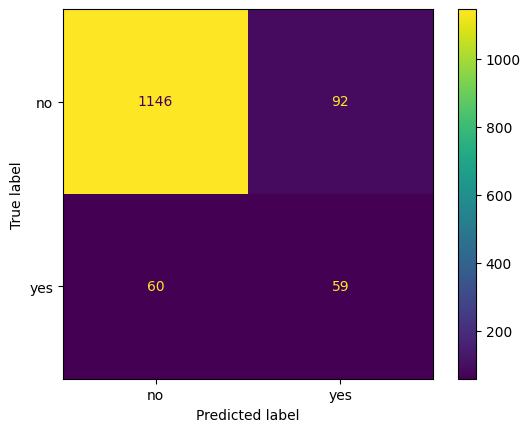

In [88]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [89]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 88.7988209285188


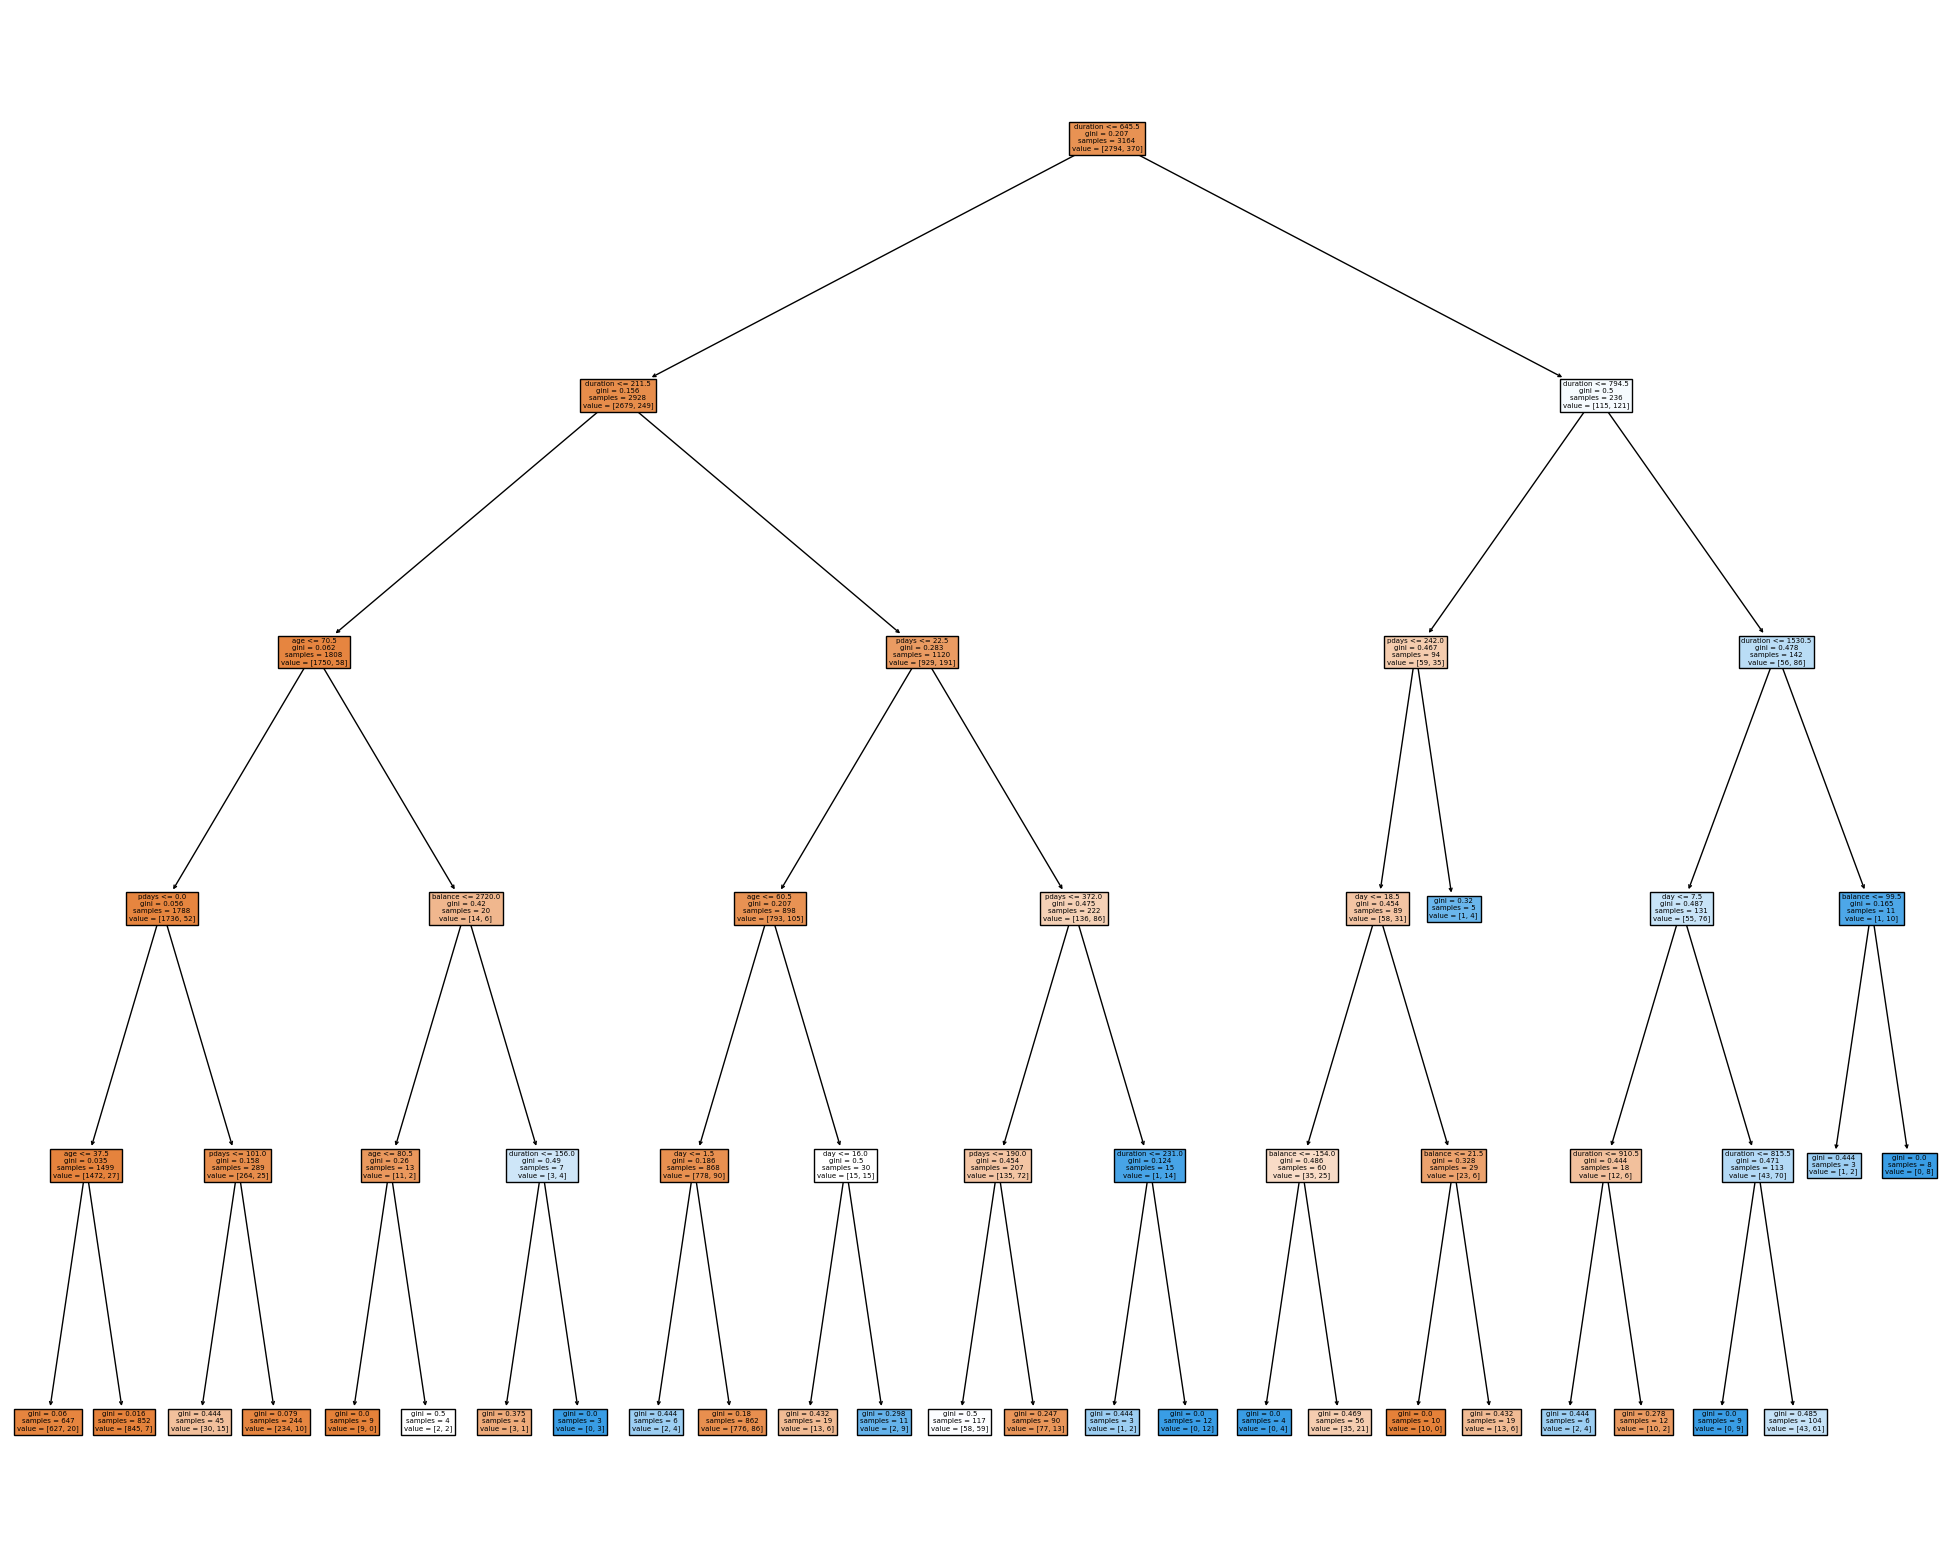

In [90]:
#Visualizing the Tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)